# Paris Subway Ridership Data Prediction
### clean data and concatenate to pandas dataframe

1. 2015 French Open: May 24 (SUN) – Jun 7
2. 2016 French Open: May 22 (SUN) – Jun 5
3. 2017 French Open: May 28 (SUN) – Jun 11
4. 2018 French Open: May 27 (SUN) – Jun 10
5. 2019 French Open: May 26 (SUN) – Jun 9
6. 2020 French Open: Sep 24 (THU) – Oct 7 (COVID no attendance, should be remove)
7. 2021 French Open: May 30 (SUN) – Jun 13 (the data seems to be affected by COVID too)
8. 2022 French Open: May 22 (SUN) – Jun 5
3. 2023 French Open: May 28 (SUN) – Jun 11

Each French has 15 days, so each day can be forcast by two earlier years corresponding day.
For example:
input -> output
2015 May 24, 2016 May 22 -> 2017 May 28
2018 May 27, 2019 May 26 -> 2021 May 30

For other non-French Open data, we can pick other dates before May 22 and after Jun 13 to predict the ridership.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
column_map = {
    "JOUR": "DATE",
    "CODE_STIF_ARRET": "STATION_ID",
    "LIBELLE_ARRET": "STATION",
    "CATEGORIE_TITRE": "TICKET_TYPE",
    "NB_VALD": "COUNT"
}

# stations: {
#     Cluny(la sorbonne), Baby-lone, vaneau, La monte-picket Grenelle, Charles michels, 
#     "porte d’auteil": "683", "odeon": "604", "baby-lone": "798", "veneau": "871", "la motte_picquet": "420", "charles michel": "155"
# }

weekday_map ={
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

fares_map = {'NON DEFINI':'normal', 
               'AMETHYSTE':'elderly', 
               'NAVIGO':'normal', 
               'NAVIGO JOUR':'daypass',
               'IMAGINE R':'student',
               'FGT':'subsidized', 
               '?':'normal', 
               'TST':'subsidized',
               'AUTRE TITRE':'normal'}

         DATE STATION_ID  COUNT DAY_OF_WEEK
0  2015-01-01        542    882    Thursday
1  2015-01-02        542   2732      Friday
2  2015-01-03        542   2377    Saturday
3  2015-01-04        542   1584      Sunday
4  2015-01-05        542   4951      Monday
363
May 24 – Jun 7


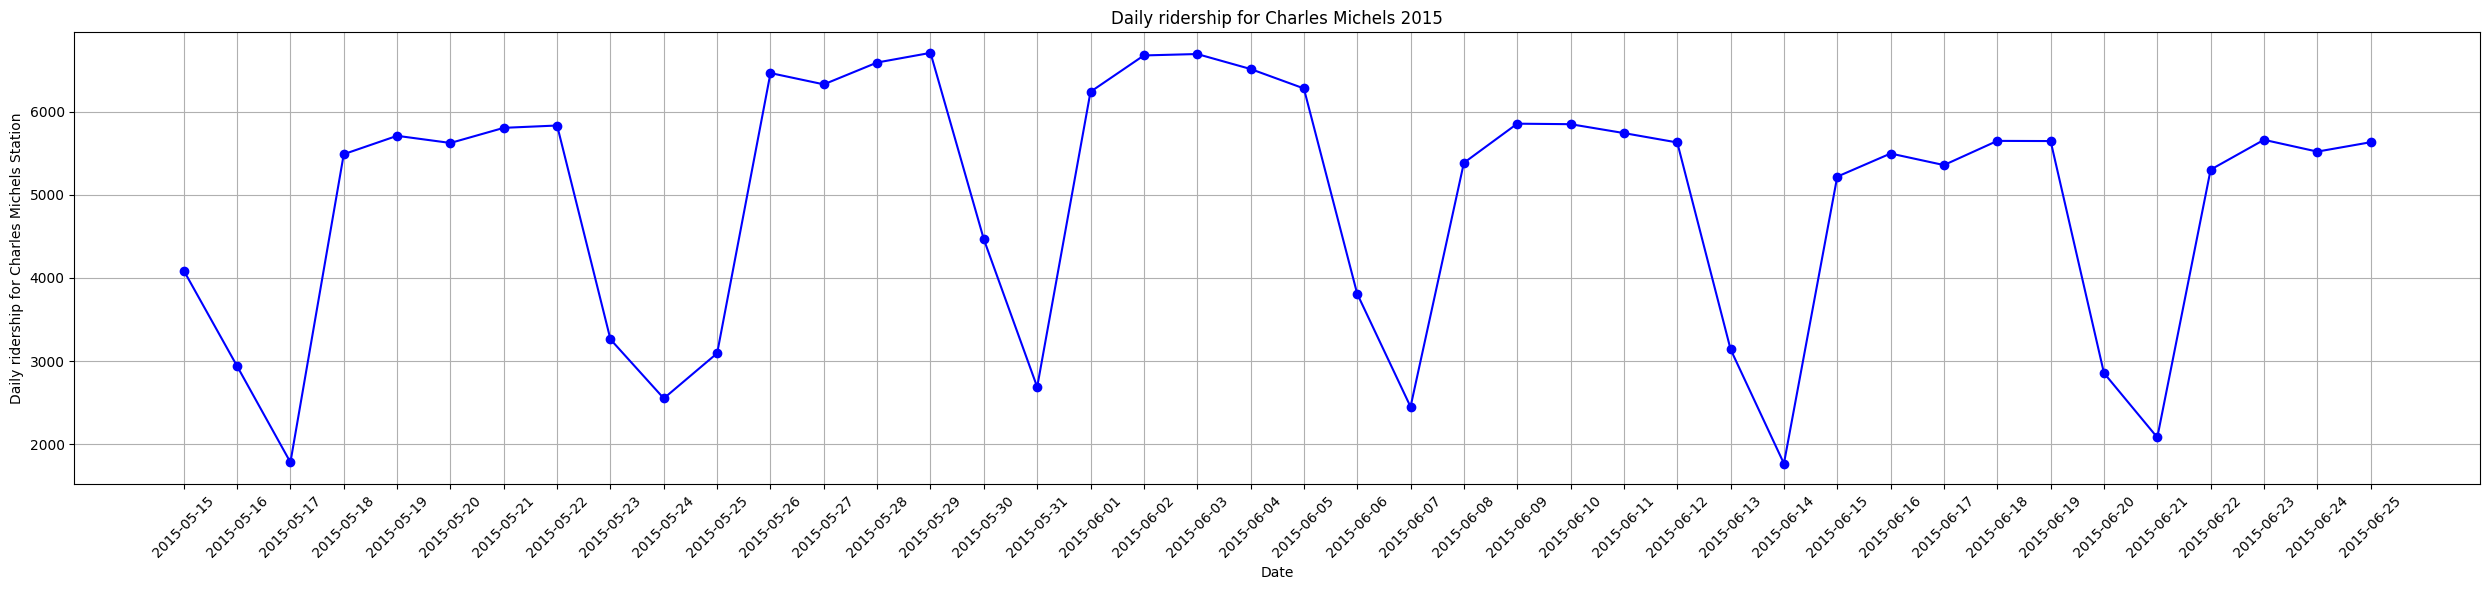

In [32]:
csv_path_2015_s1 = "../data/2015S1_NB_FER.csv"
df_2015_s1 = pd.read_csv(csv_path_2015_s1, sep=';')
df_2015_s1['JOUR'] = pd.to_datetime(df_2015_s1['JOUR'], format="%d/%m/%Y").dt.strftime('%Y-%m-%d')

csv_path_2015_s2 = "../data/2015S2_NB_FER.csv"
df_2015_s2 = pd.read_csv(csv_path_2015_s2, sep=';')
df_2015_s2['JOUR'] = pd.to_datetime(df_2015_s2['JOUR'], format="%d/%m/%Y").dt.strftime('%Y-%m-%d')

df_2015_raw = pd.concat([df_2015_s1, df_2015_s2])
df_2015_raw = df_2015_raw[["JOUR", "CODE_STIF_ARRET", "LIBELLE_ARRET", "CATEGORIE_TITRE", "NB_VALD"]].rename(columns=column_map)
df_2015_raw["TICKET_TYPE"] = df_2015_raw["TICKET_TYPE"].replace(fares_map)
df_2015_raw["COUNT"] = df_2015_raw["COUNT"].replace("Moins de 5", 4)
df_2015_raw["COUNT"] = df_2015_raw["COUNT"].astype(int)
# print(df_2015_raw[df_2015_raw["STATION"].str.contains("MICHEL-ANGE-AUTEUIL")].head())
df_2015_raw = df_2015_raw[df_2015_raw["STATION_ID"] == "542"]
 

df_2015 = df_2015_raw.groupby(["DATE", "STATION_ID", "STATION"]).sum().reset_index()
df_2015 = df_2015[["DATE", "STATION_ID", "COUNT"]]
df_2015["DAY_OF_WEEK"] = pd.to_datetime(df_2015["DATE"]).dt.day_of_week
df_2015["DAY_OF_WEEK"] = df_2015["DAY_OF_WEEK"].replace(weekday_map)
print(df_2015.head())
print(len(df_2015))
print("May 24 – Jun 7")
plt.figure(figsize=(25, 6))
plt.plot(df_2015[(df_2015["DATE"] >= "2015-05-15") & (df_2015["DATE"] <= "2015-06-25")]["DATE"], df_2015[(df_2015["DATE"] >= "2015-05-15") & (df_2015["DATE"] <= "2015-06-25")]["COUNT"], marker='o', linestyle='-', color='b')
plt.xlabel("Date")
plt.ylabel("Daily ridership for Charles Michels Station")
plt.title("Daily ridership for Charles Michels 2015")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


         DATE STATION_ID  COUNT DAY_OF_WEEK
0  2016-01-01        542    698      Friday
1  2016-01-02        542   1989    Saturday
2  2016-01-03        542   1500      Sunday
3  2016-01-04        542   4665      Monday
4  2016-01-05        542   5456     Tuesday
362


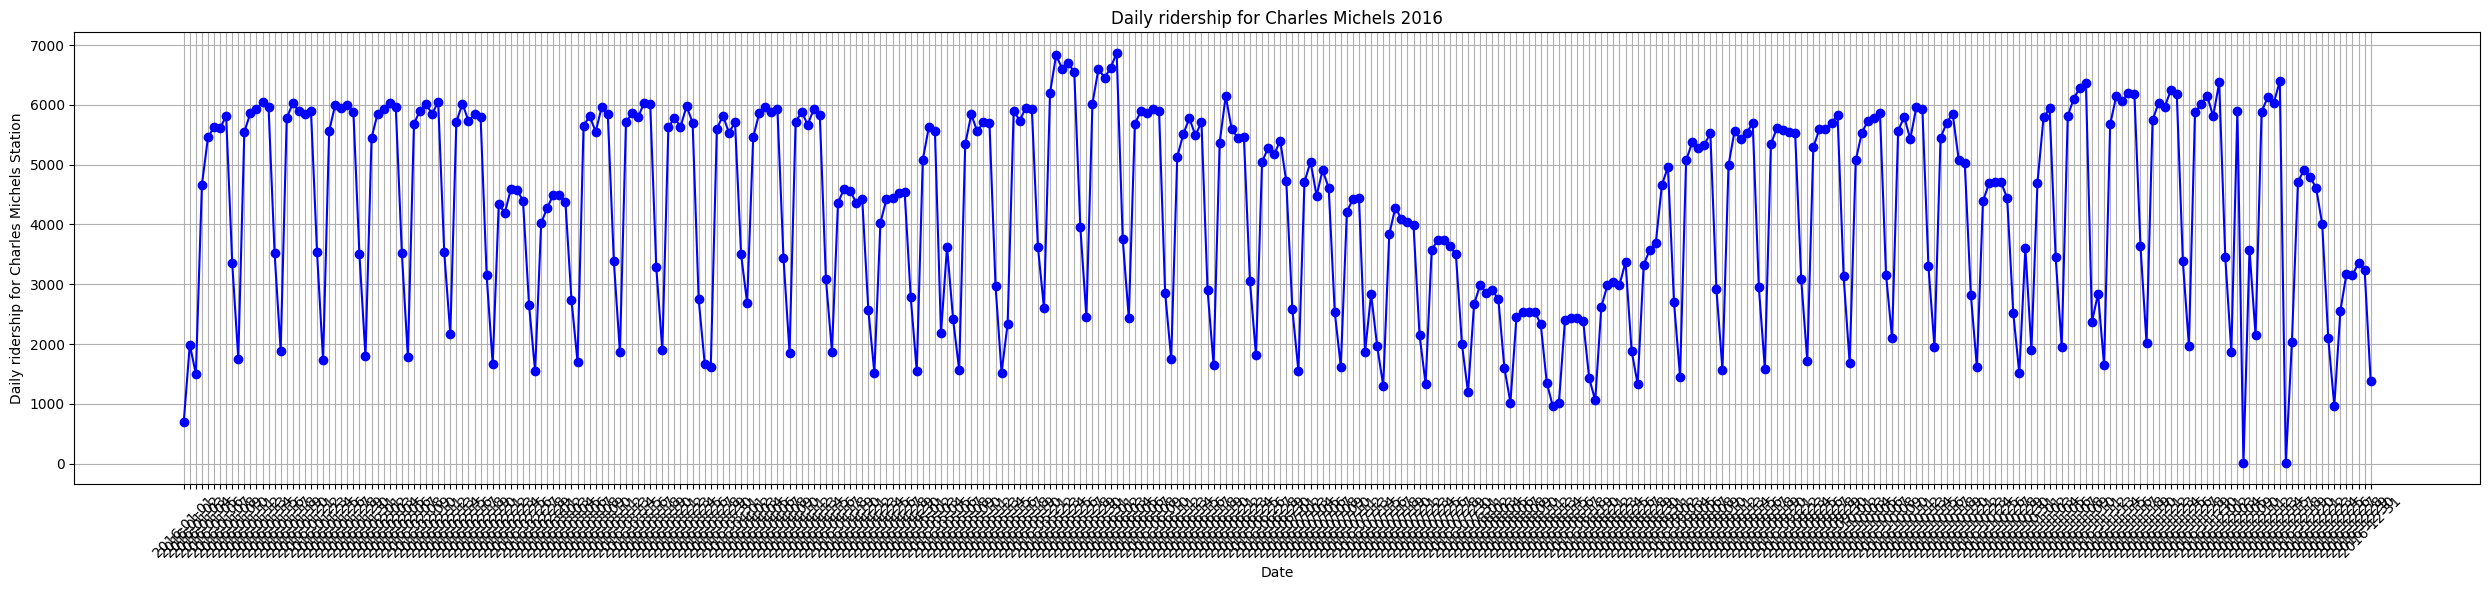

In [7]:
csv_path_2016_s1 = "../data/2016S1_NB_FER.txt"
df_2016_s1 = pd.read_csv(csv_path_2016_s1, delimiter='\t')
df_2016_s1['JOUR'] = pd.to_datetime(df_2016_s1['JOUR'], format="%d/%m/%Y").dt.strftime('%Y-%m-%d')

csv_path_2016_s2 = "../data/2016S2_NB_FER.txt"
df_2016_s2 = pd.read_csv(csv_path_2016_s2, delimiter='\t')
df_2016_s2['JOUR'] = pd.to_datetime(df_2016_s2['JOUR'], format="%d/%m/%Y").dt.strftime('%Y-%m-%d')

df_2016_raw = pd.concat([df_2016_s1, df_2016_s2])
df_2016_raw = df_2016_raw[["JOUR", "CODE_STIF_ARRET", "LIBELLE_ARRET", "CATEGORIE_TITRE", "NB_VALD"]].rename(columns=column_map)
df_2016_raw["TICKET_TYPE"] = df_2016_raw["TICKET_TYPE"].replace(fares_map)
df_2016_raw["COUNT"] = df_2016_raw["COUNT"].replace("Moins de 5", 4)
df_2016_raw["COUNT"] = df_2016_raw["COUNT"].astype(int)
df_2016_raw = df_2016_raw[df_2016_raw["STATION_ID"] == "542"]
 
df_2016 = df_2016_raw.groupby(["DATE", "STATION_ID", "STATION"]).sum().reset_index()
df_2016 = df_2016[["DATE", "STATION_ID", "COUNT"]]
df_2016["DAY_OF_WEEK"] = pd.to_datetime(df_2016["DATE"]).dt.day_of_week
df_2016["DAY_OF_WEEK"] = df_2016["DAY_OF_WEEK"].replace(weekday_map)
print(df_2016.head())
print(len(df_2016))
plt.figure(figsize=(25, 6))
plt.plot(df_2016["DATE"], df_2016["COUNT"], marker='o', linestyle='-', color='b')
plt.xlabel("Date")
plt.ylabel("Daily ridership for Charles Michels Station")
plt.title("Daily ridership for Charles Michels 2016")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig("charles_michels_2016.png")
plt.show()

           DATE STATION_ID STATION TICKET_TYPE  COUNT
606  2017-01-01        377   JAVEL     elderly     46
607  2017-01-01        377   JAVEL      normal     13
608  2017-01-01        377   JAVEL  subsidized     25
609  2017-01-01        377   JAVEL     student    186
610  2017-01-01        377   JAVEL      normal    472
         DATE STATION_ID  COUNT DAY_OF_WEEK
0  2017-01-01          1   4215      Sunday
1  2017-01-01         10   2944      Sunday
2  2017-01-01        100   1029      Sunday
3  2017-01-01       1006   3373      Sunday
4  2017-01-01       1007   1163      Sunday
270620


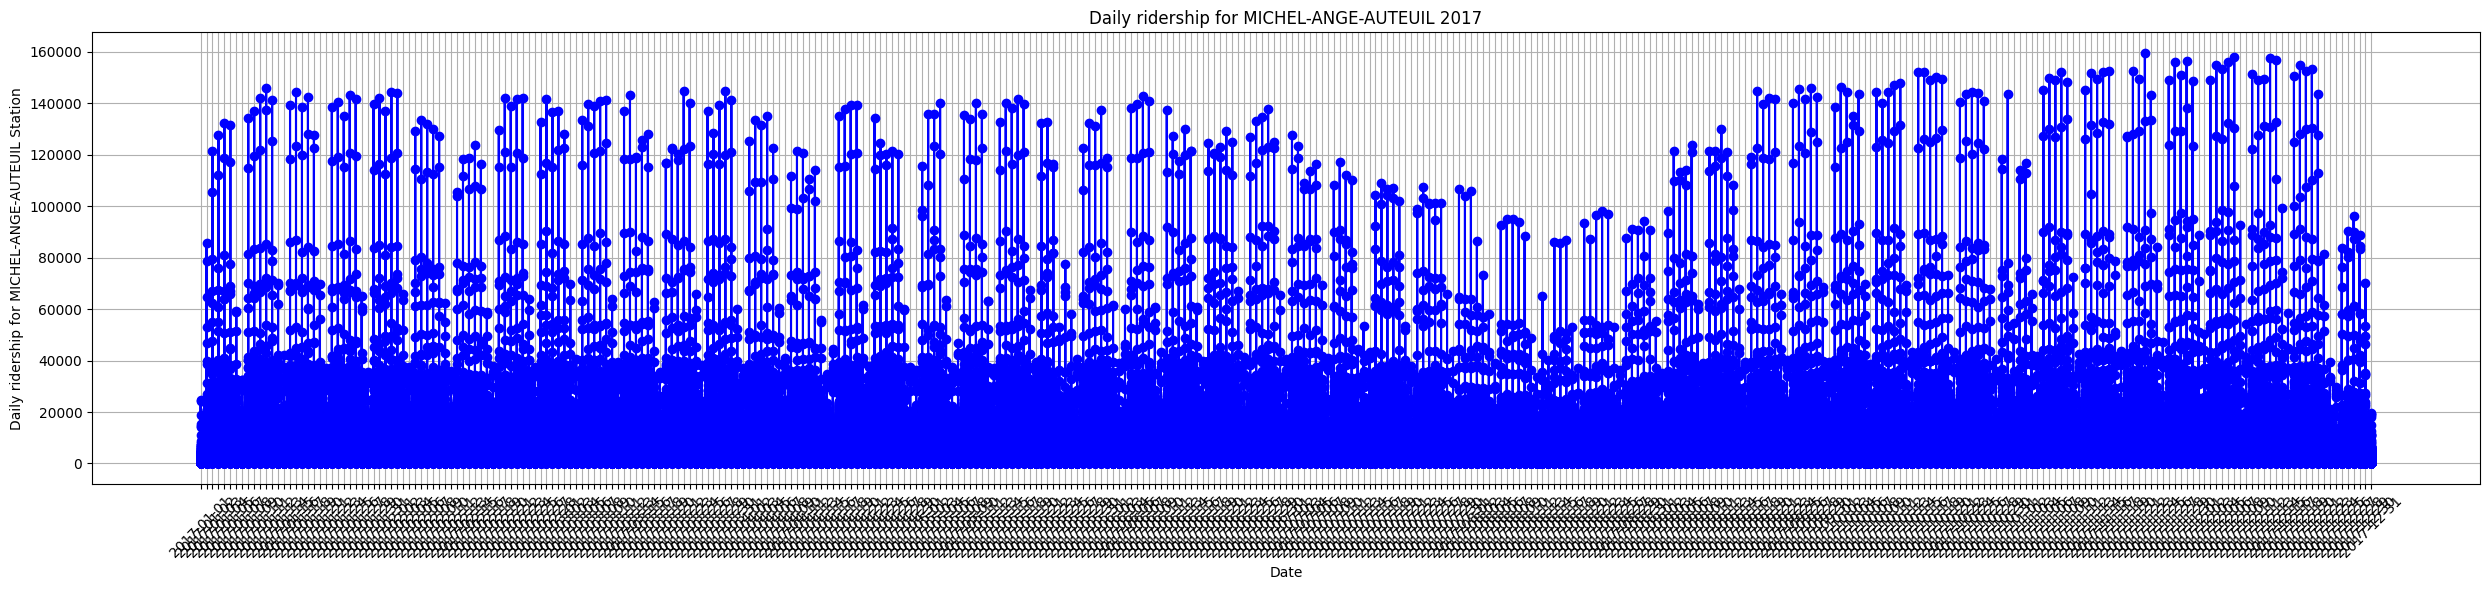

In [8]:
csv_path_2017_s1 = "../data/2017_S1_NB_FER.txt"
df_2017_s1 = pd.read_csv(csv_path_2017_s1, delimiter='\t')
df_2017_s1['JOUR'] = pd.to_datetime(df_2017_s1['JOUR'], format="%d/%m/%Y").dt.strftime('%Y-%m-%d')

csv_path_2017_s2 = "../data/2017_S2_NB_FER.txt"
df_2017_s2 = pd.read_csv(csv_path_2017_s2, delimiter='\t')
df_2017_s2['JOUR'] = pd.to_datetime(df_2017_s2['JOUR'], format="%d/%m/%Y").dt.strftime('%Y-%m-%d')

df_2017_raw = pd.concat([df_2017_s1, df_2017_s2])
df_2017_raw = df_2017_raw[["JOUR", "CODE_STIF_ARRET", "LIBELLE_ARRET", "CATEGORIE_TITRE", "NB_VALD"]].rename(columns=column_map)
df_2017_raw["TICKET_TYPE"] = df_2017_raw["TICKET_TYPE"].replace(fares_map)
df_2017_raw["COUNT"] = df_2017_raw["COUNT"].replace("Moins de 5", 4)
df_2017_raw["COUNT"] = df_2017_raw["COUNT"].astype(int)
# print(df_2017_raw[df_2017_raw["STATION"].str.contains("JAVEL")].head())
df_2017_raw = df_2017_raw[df_2017_raw["STATION_ID"] == "542"]
 
df_2017 = df_2017_raw.groupby(["DATE", "STATION_ID"]).sum().reset_index()
df_2017 = df_2017[["DATE", "STATION_ID", "COUNT"]]
df_2017["DAY_OF_WEEK"] = pd.to_datetime(df_2017["DATE"]).dt.day_of_week
df_2017["DAY_OF_WEEK"] = df_2017["DAY_OF_WEEK"].replace(weekday_map)
print(df_2017.head())
print(len(df_2017))
plt.figure(figsize=(25, 6))
plt.plot(df_2017["DATE"], df_2017["COUNT"], marker='o', linestyle='-', color='b')
plt.xlabel("Date")
plt.ylabel("Daily ridership for MICHEL-ANGE-AUTEUIL Station")
plt.title("Daily ridership for MICHEL-ANGE-AUTEUIL 2017")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

         DATE STATION_ID  COUNT DAY_OF_WEEK
0  2018-01-01        542    762      Monday
1  2018-01-02        542   3489     Tuesday
2  2018-01-03        542   4052   Wednesday
3  2018-01-04        542   4402    Thursday
4  2018-01-05        542   4426      Friday
365


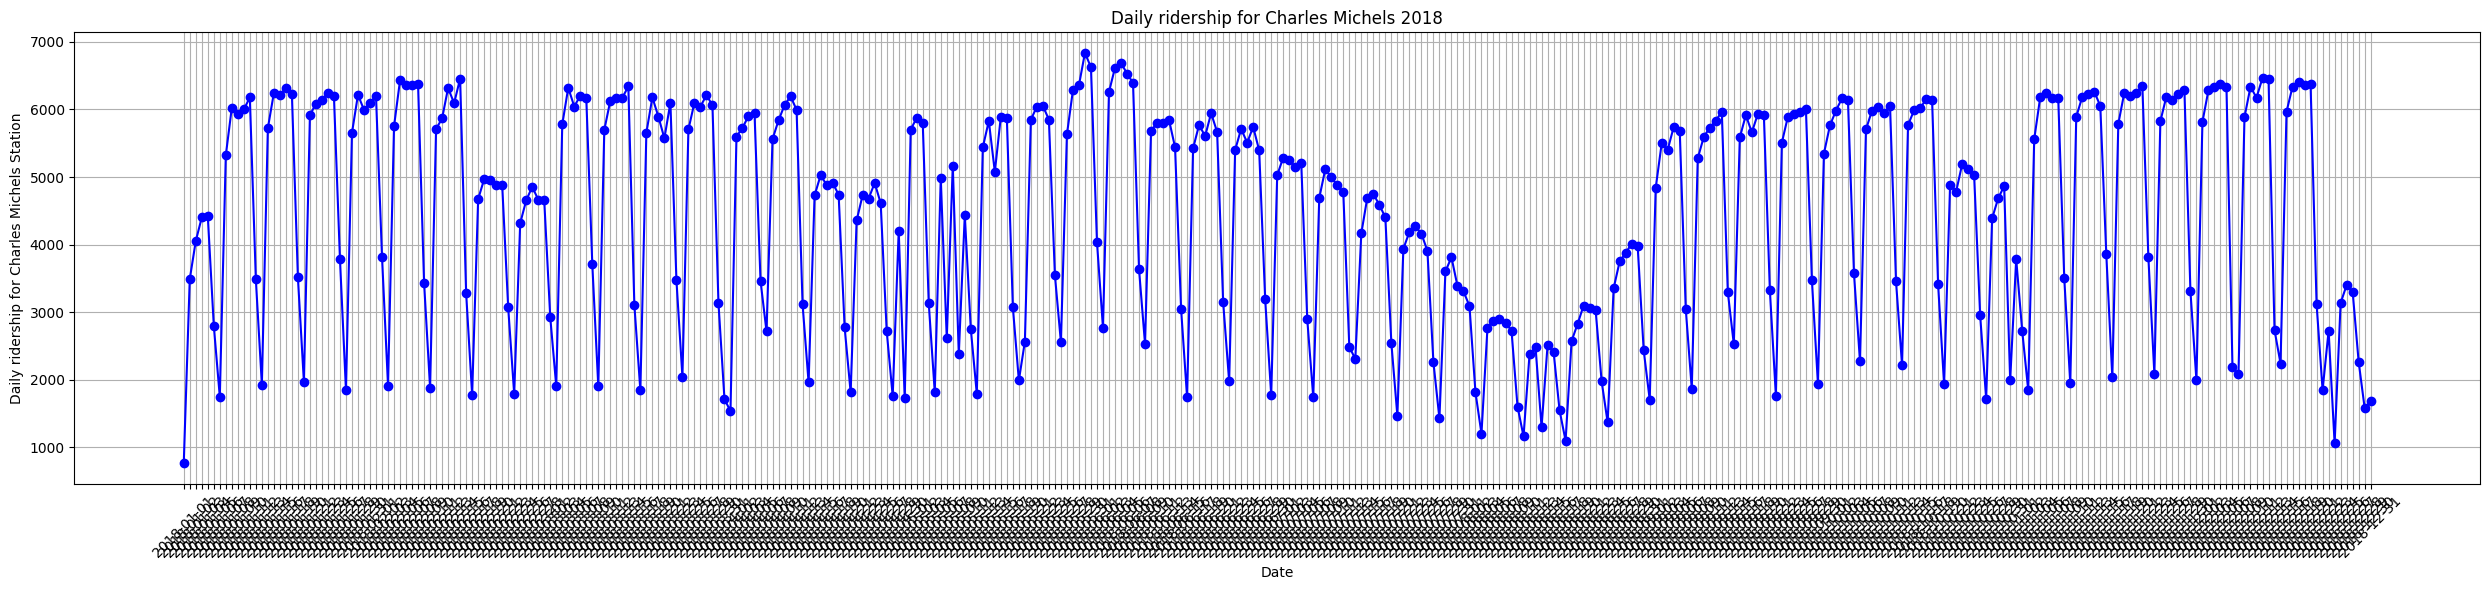

In [35]:
csv_path_2018_s1 = "../data/2018_S1_NB_FER.txt"
df_2018_s1 = pd.read_csv(csv_path_2018_s1, delimiter='\t')
df_2018_s1['JOUR'] = pd.to_datetime(df_2018_s1['JOUR'], format="%d/%m/%Y").dt.strftime('%Y-%m-%d')

csv_path_2018_s2 = "../data/2018_S2_NB_FER.txt"
df_2018_s2 = pd.read_csv(csv_path_2018_s2, delimiter='\t')
df_2018_s2['JOUR'] = pd.to_datetime(df_2018_s2['JOUR'], format="%d/%m/%Y").dt.strftime('%Y-%m-%d')

df_2018_raw = pd.concat([df_2018_s1, df_2018_s2])
df_2018_raw = df_2018_raw[["JOUR", "CODE_STIF_ARRET", "LIBELLE_ARRET", "CATEGORIE_TITRE", "NB_VALD"]].rename(columns=column_map)
df_2018_raw["TICKET_TYPE"] = df_2018_raw["TICKET_TYPE"].replace(fares_map)
df_2018_raw["COUNT"] = df_2018_raw["COUNT"].replace("Moins de 5", 4)
df_2018_raw["COUNT"] = df_2018_raw["COUNT"].astype(int)
df_2018_raw = df_2018_raw[df_2018_raw["STATION_ID"] == "542"]
 
df_2018 = df_2018_raw.groupby(["DATE", "STATION_ID"]).sum().reset_index()
df_2018 = df_2018[["DATE", "STATION_ID", "COUNT"]]
df_2018["DAY_OF_WEEK"] = pd.to_datetime(df_2018["DATE"]).dt.day_of_week
df_2018["DAY_OF_WEEK"] = df_2018["DAY_OF_WEEK"].replace(weekday_map)
print(df_2018.head())
print(len(df_2018))
plt.figure(figsize=(25, 6))
plt.plot(df_2018["DATE"], df_2018["COUNT"], marker='o', linestyle='-', color='b')
plt.xlabel("Date")
plt.ylabel("Daily ridership for Charles Michels Station")
plt.title("Daily ridership for Charles Michels 2018")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

         DATE STATION_ID  COUNT DAY_OF_WEEK
0  2019-01-01        542    890     Tuesday
1  2019-01-02        542   3730   Wednesday
2  2019-01-03        542   4275    Thursday
3  2019-01-04        542   4332      Friday
4  2019-01-05        542   2901    Saturday
361


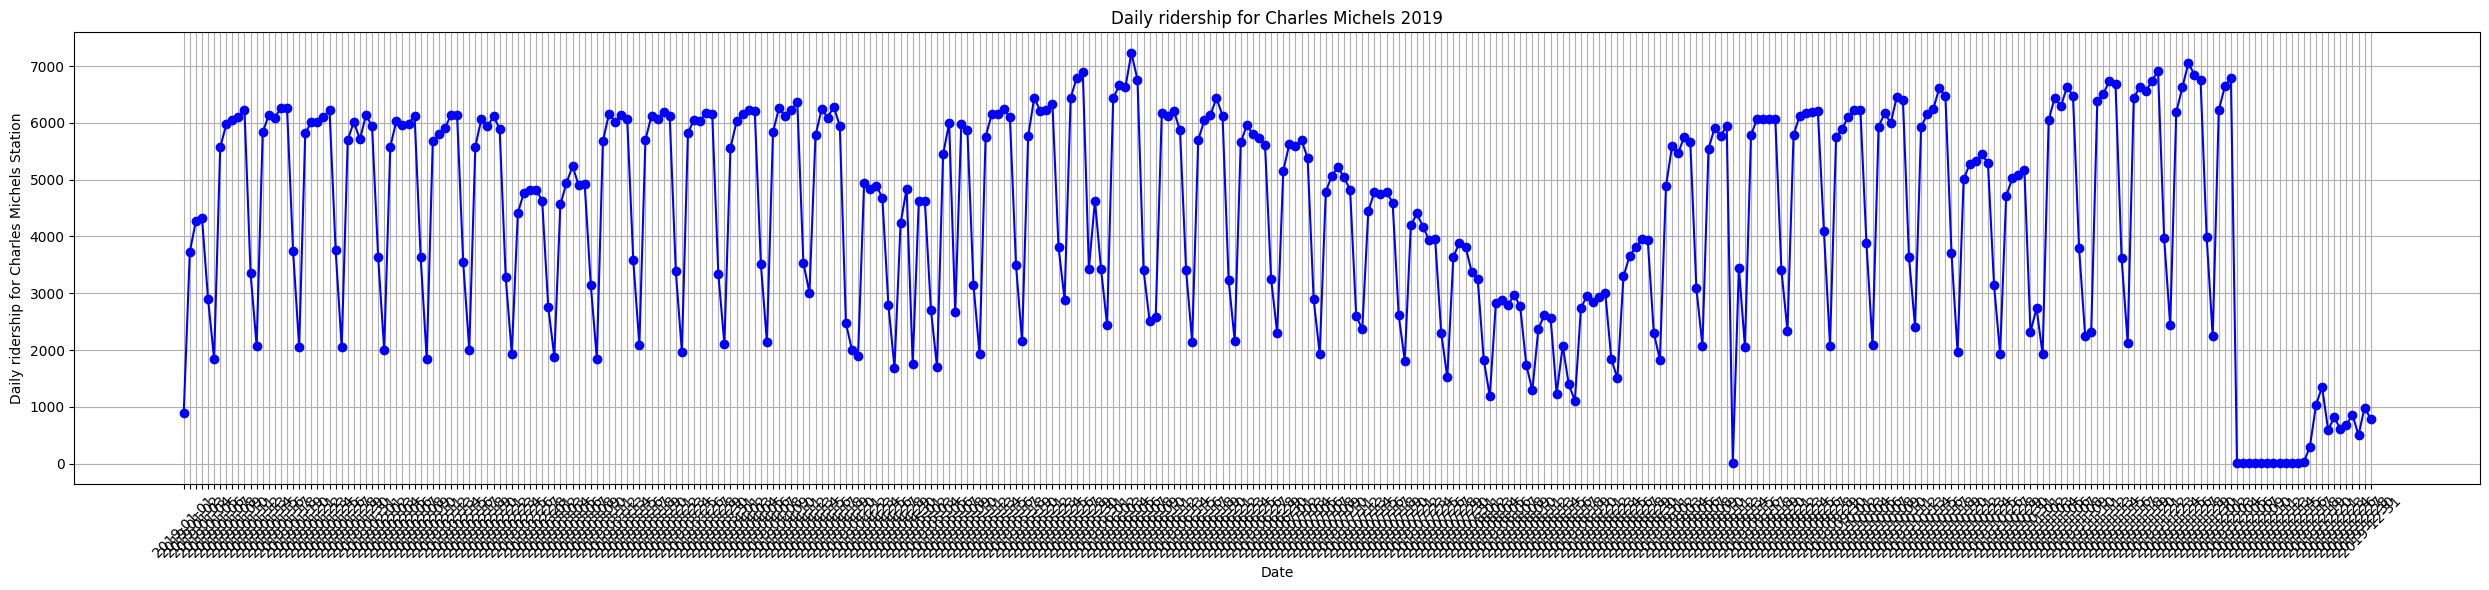

In [36]:
csv_path_2019_s1 = "../data/2019_S1_NB_FER.txt"
df_2019_s1 = pd.read_csv(csv_path_2019_s1, delimiter='\t')
df_2019_s1['JOUR'] = pd.to_datetime(df_2019_s1['JOUR'], format="%d/%m/%Y").dt.strftime('%Y-%m-%d')

csv_path_2019_s2 = "../data/2019_S2_NB_FER.txt"
df_2019_s2 = pd.read_csv(csv_path_2019_s2, delimiter='\t')
df_2019_s2['JOUR'] = pd.to_datetime(df_2019_s2['JOUR'], format="%d/%m/%Y").dt.strftime('%Y-%m-%d')

df_2019_raw = pd.concat([df_2019_s1, df_2019_s2])
df_2019_raw = df_2019_raw[["JOUR", "CODE_STIF_ARRET", "LIBELLE_ARRET", "CATEGORIE_TITRE", "NB_VALD"]].rename(columns=column_map)
df_2019_raw["TICKET_TYPE"] = df_2019_raw["TICKET_TYPE"].replace(fares_map)
df_2019_raw["COUNT"] = df_2019_raw["COUNT"].replace("Moins de 5", 4)
df_2019_raw["COUNT"] = df_2019_raw["COUNT"].astype(int)
# df_2019_raw[df_2019_raw["STATION"].str.contains("D'AUTEUIL")]["STATION"].unique()
df_2019_raw = df_2019_raw[df_2019_raw["STATION_ID"] == "542"]
 
df_2019 = df_2019_raw.groupby(["DATE", "STATION_ID"]).sum().reset_index()
df_2019 = df_2019[["DATE", "STATION_ID", "COUNT"]]
df_2019["DAY_OF_WEEK"] = pd.to_datetime(df_2019["DATE"]).dt.day_of_week
df_2019["DAY_OF_WEEK"] = df_2019["DAY_OF_WEEK"].replace(weekday_map)
print(df_2019.head())
print(len(df_2019))
plt.figure(figsize=(25, 6))
plt.plot(df_2019["DATE"], df_2019["COUNT"], marker='o', linestyle='-', color='b')
plt.xlabel("Date")
plt.ylabel("Daily ridership for Charles Michels Station")
plt.title("Daily ridership for Charles Michels 2019")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

         DATE STATION_ID  COUNT DAY_OF_WEEK
0  2020-01-01        542      9   Wednesday
1  2020-01-02        542   1262    Thursday
2  2020-01-03        542   1316      Friday
3  2020-01-04        542    809    Saturday
4  2020-01-05        542    452      Sunday
366


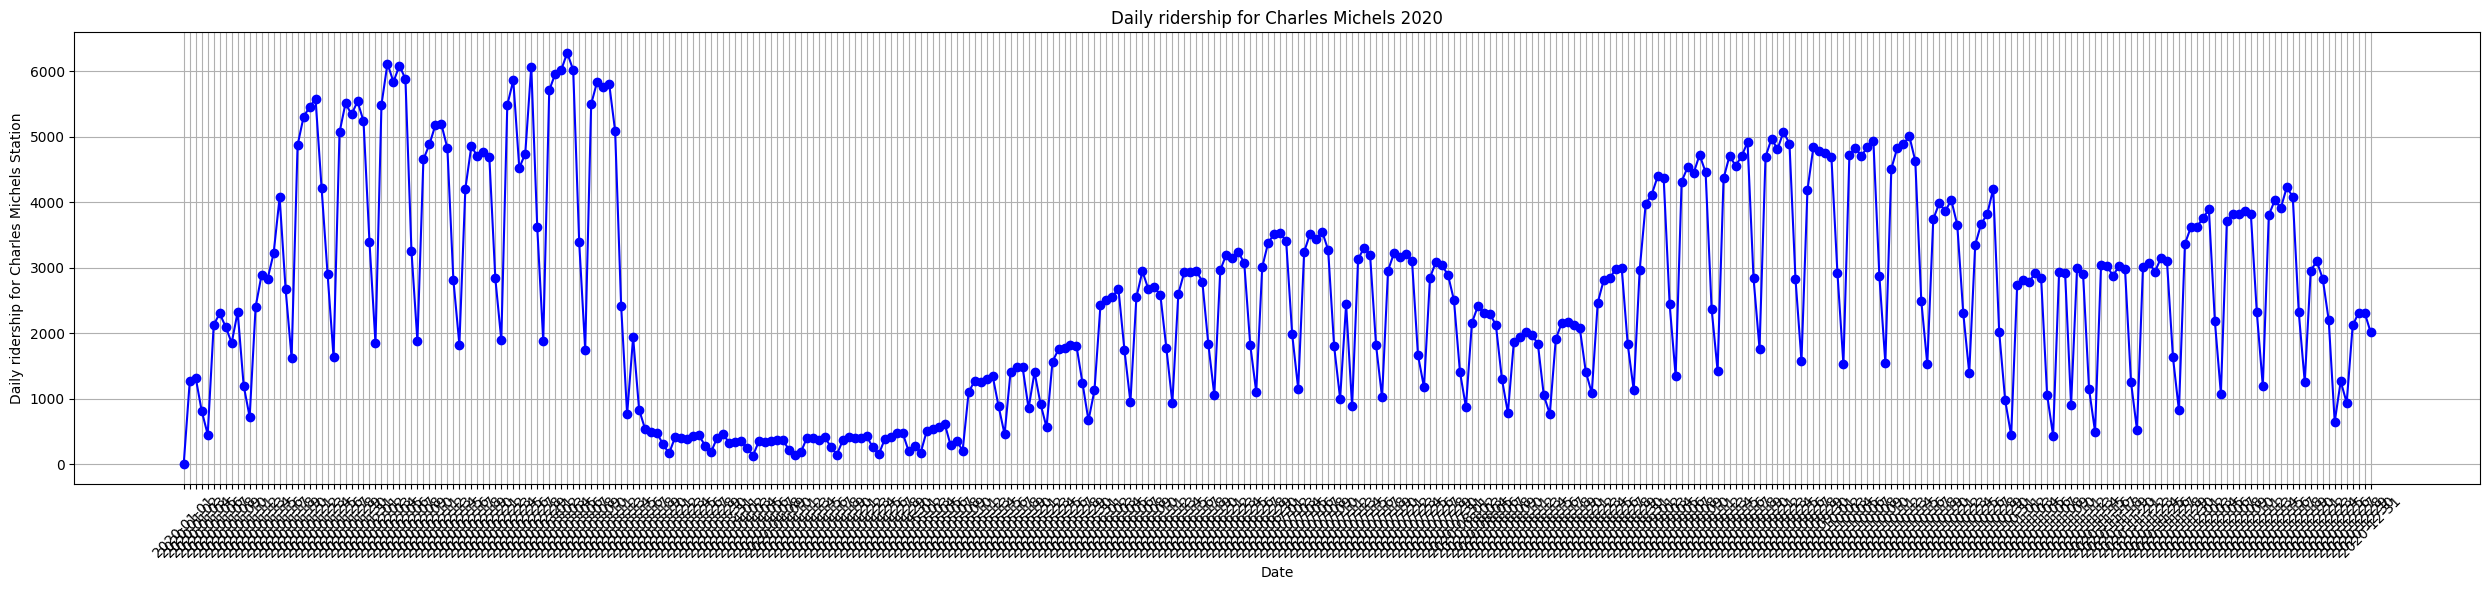

In [37]:
csv_path_2020_s1 = "../data/2020_S1_NB_FER.txt"
df_2020_s1 = pd.read_csv(csv_path_2020_s1, delimiter='\t')
df_2020_s1['JOUR'] = pd.to_datetime(df_2020_s1['JOUR'], format="%d/%m/%Y").dt.strftime('%Y-%m-%d')

csv_path_2020_s2 = "../data/2020_S2_NB_FER.txt"
df_2020_s2 = pd.read_csv(csv_path_2020_s2, delimiter='\t')
df_2020_s2['JOUR'] = pd.to_datetime(df_2020_s2['JOUR'], format="%d/%m/%Y").dt.strftime('%Y-%m-%d')

df_2020_raw = pd.concat([df_2020_s1, df_2020_s2])
df_2020_raw = df_2020_raw[["JOUR", "CODE_STIF_ARRET", "LIBELLE_ARRET", "CATEGORIE_TITRE", "NB_VALD"]].rename(columns=column_map)
df_2020_raw["TICKET_TYPE"] = df_2020_raw["TICKET_TYPE"].replace(fares_map)
df_2020_raw["COUNT"] = df_2020_raw["COUNT"].replace("Moins de 5", 4)
df_2020_raw["COUNT"] = df_2020_raw["COUNT"].astype(int)
df_2020_raw = df_2020_raw[df_2020_raw["STATION_ID"] == "542"]
 
df_2020 = df_2020_raw.groupby(["DATE", "STATION_ID"]).sum().reset_index()
df_2020 = df_2020[["DATE", "STATION_ID", "COUNT"]]
df_2020["DAY_OF_WEEK"] = pd.to_datetime(df_2020["DATE"]).dt.day_of_week
df_2020["DAY_OF_WEEK"] = df_2020["DAY_OF_WEEK"].replace(weekday_map)
print(df_2020.head())
print(len(df_2020))
plt.figure(figsize=(25, 6))
plt.plot(df_2020["DATE"], df_2020["COUNT"], marker='o', linestyle='-', color='b')
plt.xlabel("Date")
plt.ylabel("Daily ridership for Charles Michels Station")
plt.title("Daily ridership for Charles Michels 2020")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

         DATE STATION_ID  COUNT DAY_OF_WEEK
0  2021-01-01        542    694      Friday
1  2021-01-02        542   1327    Saturday
2  2021-01-03        542    968      Sunday
3  2021-01-04        542   3588      Monday
4  2021-01-05        542   3786     Tuesday
279


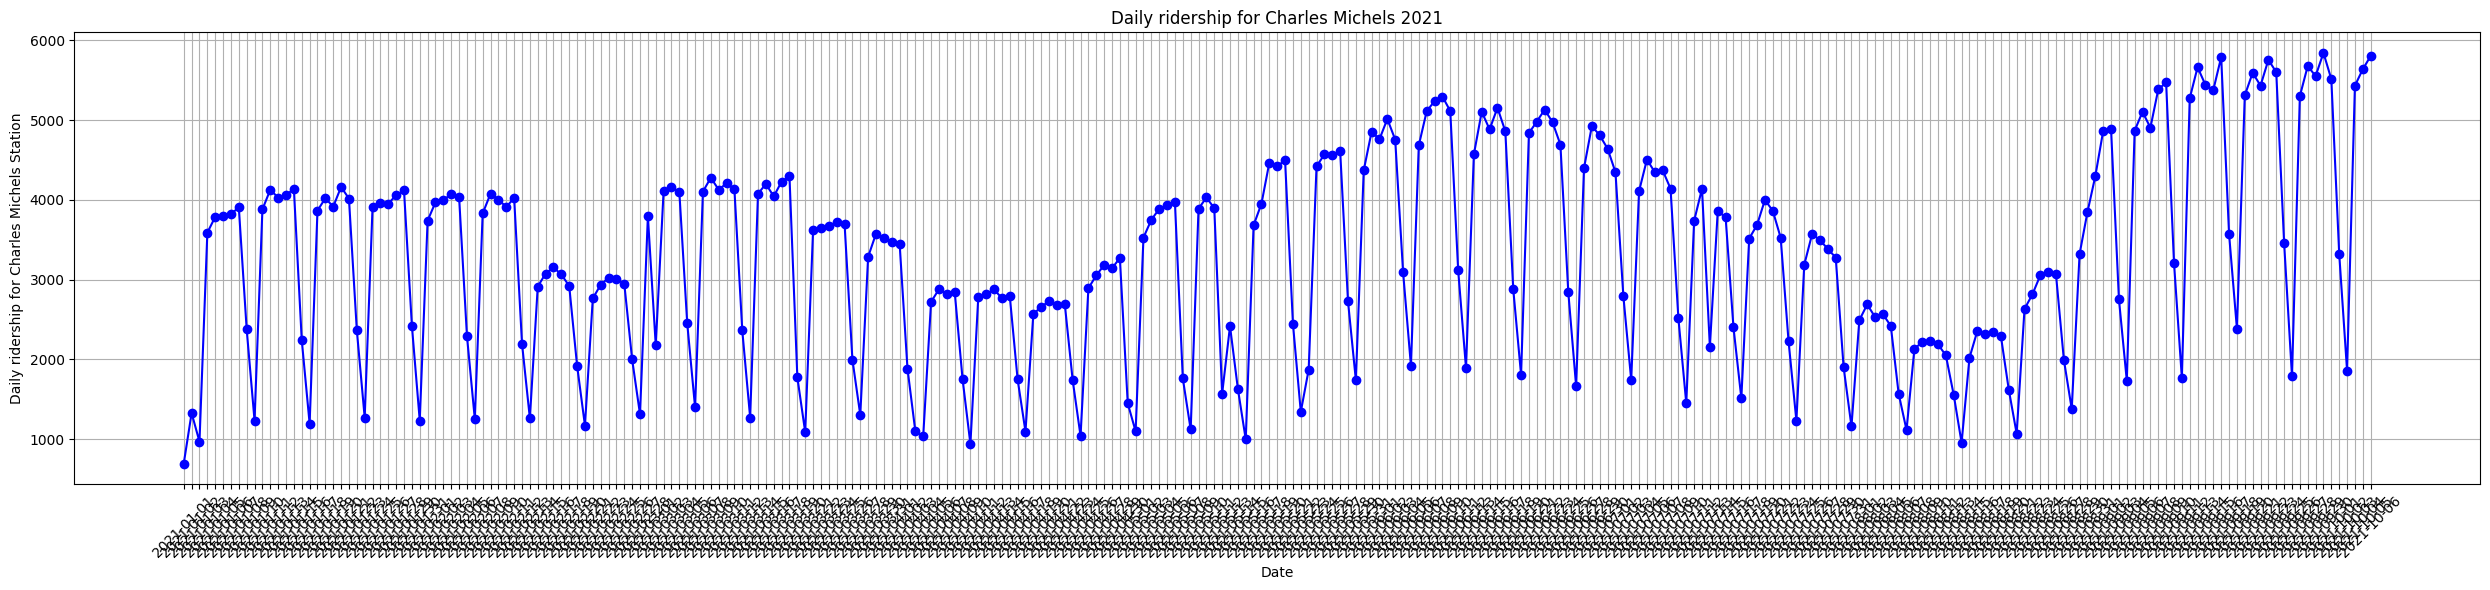

In [38]:
csv_path_2021_s1 = "../data/2021_S1_NB_FER.txt"
df_2021_s1 = pd.read_csv(csv_path_2021_s1, delimiter='\t')
df_2021_s1['JOUR'] = pd.to_datetime(df_2021_s1['JOUR'], format="%d/%m/%Y").dt.strftime('%Y-%m-%d')

csv_path_2021_s2 = "../data/2021_S2_NB_FER.txt"
df_2021_s2 = pd.read_csv(csv_path_2021_s2, delimiter='\t')
df_2021_s2['JOUR'] = pd.to_datetime(df_2021_s2['JOUR'], format="%d/%m/%Y").dt.strftime('%Y-%m-%d')

df_2021_raw = pd.concat([df_2021_s1, df_2021_s2])
df_2021_raw = df_2021_raw[["JOUR", "CODE_STIF_ARRET", "LIBELLE_ARRET", "CATEGORIE_TITRE", "NB_VALD"]].rename(columns=column_map)
df_2021_raw["TICKET_TYPE"] = df_2021_raw["TICKET_TYPE"].replace(fares_map)
df_2021_raw["COUNT"] = df_2021_raw["COUNT"].replace("Moins de 5", 4)
df_2021_raw["COUNT"] = df_2021_raw["COUNT"].astype(int)
df_2021_raw = df_2021_raw[df_2021_raw["STATION_ID"] == "542"]
 
df_2021 = df_2021_raw.groupby(["DATE", "STATION_ID"]).sum().reset_index()
df_2021 = df_2021[["DATE", "STATION_ID", "COUNT"]]
df_2021["DAY_OF_WEEK"] = pd.to_datetime(df_2021["DATE"]).dt.day_of_week
df_2021["DAY_OF_WEEK"] = df_2021["DAY_OF_WEEK"].replace(weekday_map)
print(df_2021.head())
print(len(df_2021))
plt.figure(figsize=(25, 6))
plt.plot(df_2021["DATE"], df_2021["COUNT"], marker='o', linestyle='-', color='b')
plt.xlabel("Date")
plt.ylabel("Daily ridership for Charles Michels Station")
plt.title("Daily ridership for Charles Michels 2021")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

         DATE STATION_ID  COUNT DAY_OF_WEEK
0  2022-02-15        542   3454     Tuesday
1  2022-02-16        542   5846   Wednesday
2  2022-02-17        542   6557    Thursday
3  2022-02-18        542   3478      Friday
4  2022-02-19        542   3457    Saturday
320


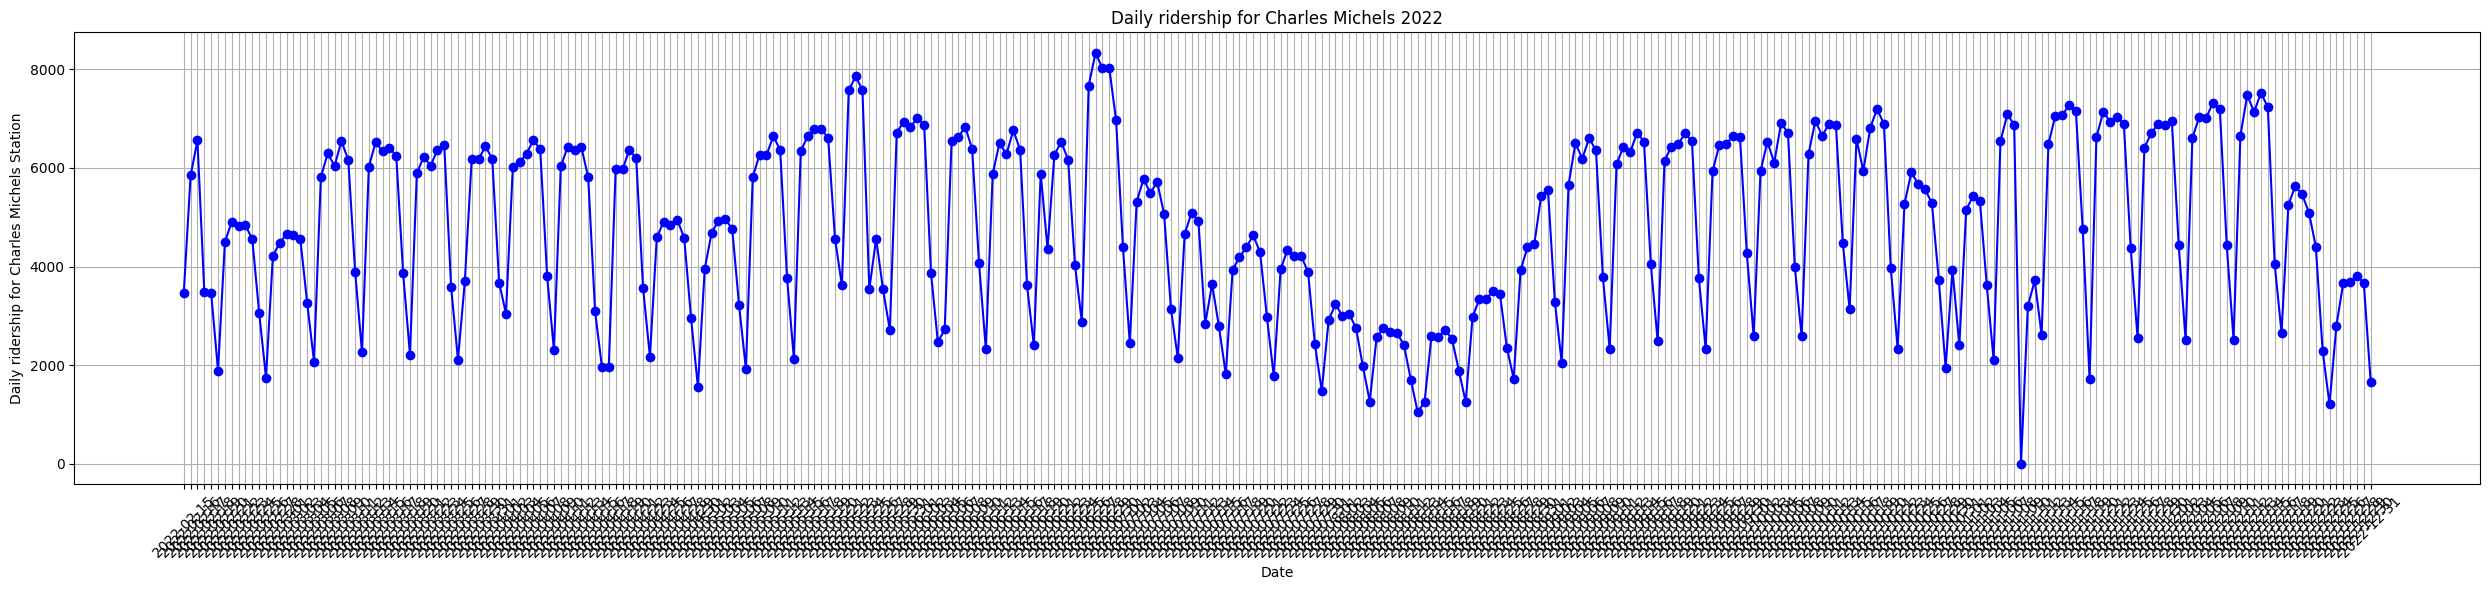

In [39]:
csv_path_2022_s1 = '../data/2022_S1_NB_FER.txt'
df_2022_s1 = pd.read_csv(csv_path_2022_s1, delimiter='\t')
df_2022_s1['JOUR'] = pd.to_datetime(df_2022_s1['JOUR'], format="%d/%m/%Y").dt.strftime('%Y-%m-%d')

csv_path_2022_s2 = '../data/2022_S2_NB_FER.txt'
df_2022_s2 = pd.read_csv(csv_path_2022_s2, delimiter=';')
df_2022_s2['JOUR'] = pd.to_datetime(df_2022_s2['JOUR'], format="%d/%m/%Y").dt.strftime('%Y-%m-%d')

df_2022_raw = pd.concat([df_2022_s1, df_2022_s2])
df_2022_raw = df_2022_raw[["JOUR", "CODE_STIF_ARRET", "LIBELLE_ARRET", "CATEGORIE_TITRE", "NB_VALD"]].rename(columns=column_map)
df_2022_raw["TICKET_TYPE"] = df_2022_raw["TICKET_TYPE"].replace(fares_map)
df_2022_raw["COUNT"] = df_2022_raw["COUNT"].replace("Moins de 5", 4)
df_2022_raw["COUNT"] = df_2022_raw["COUNT"].astype(int)
df_2022_raw = df_2022_raw[df_2022_raw["STATION_ID"] == "542"]
 
df_2022 = df_2022_raw.groupby(["DATE", "STATION_ID"]).sum().reset_index()
df_2022 = df_2022[["DATE", "STATION_ID", "COUNT"]]
df_2022["DAY_OF_WEEK"] = pd.to_datetime(df_2022["DATE"]).dt.day_of_week
df_2022["DAY_OF_WEEK"] = df_2022["DAY_OF_WEEK"].replace(weekday_map)
print(df_2022.head())
print(len(df_2022))
plt.figure(figsize=(25, 6))
plt.plot(df_2022["DATE"], df_2022["COUNT"], marker='o', linestyle='-', color='b')
plt.xlabel("Date")
plt.ylabel("Daily ridership for Charles Michels Station")
plt.title("Daily ridership for Charles Michels 2022")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

['SUCY-BONNEUIL' 'BONNE NOUVELLE' 'ERMONT EAUBONNE']
        DATE STATION_ID  COUNT DAY_OF_WEEK
0 2023-01-01          1   3201      Sunday
1 2023-01-01         10   3039      Sunday
2 2023-01-01        100   1769      Sunday
3 2023-01-01       1006   3762      Sunday
4 2023-01-01       1007    930      Sunday
135852


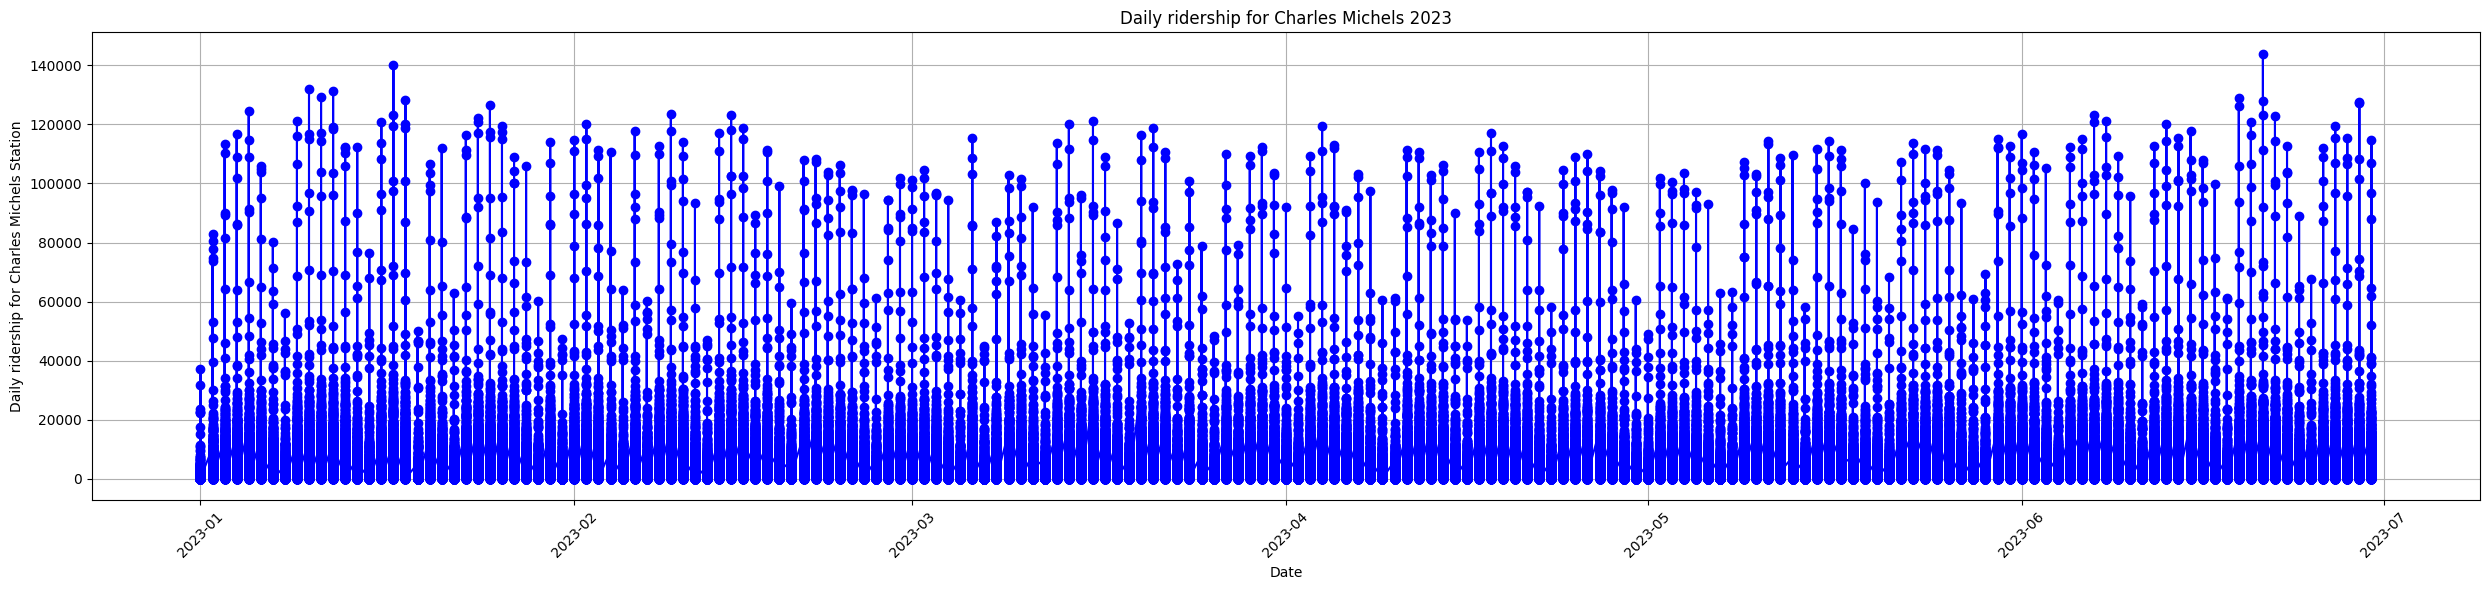

In [12]:
csv_path_2023_s1 = '../data/validations-reseau-ferre-nombre-validations-par-jour-1er-semestre.csv'
df_2023_s1 = pd.read_csv(csv_path_2023_s1, delimiter=';')
df_2023_s1['JOUR'] = pd.to_datetime(df_2023_s1['JOUR'])

df_2023_raw = pd.concat([df_2023_s1])
df_2023_raw = df_2023_raw[["JOUR", "CODE_STIF_ARRET", "LIBELLE_ARRET", "CATEGORIE_TITRE", "NB_VALD"]].rename(columns=column_map)
df_2023_raw["TICKET_TYPE"] = df_2023_raw["TICKET_TYPE"].replace(fares_map)
df_2023_raw["COUNT"] = df_2023_raw["COUNT"].replace("Moins de 5", 4)
df_2023_raw["COUNT"] = df_2023_raw["COUNT"].astype(int)
print(df_2023_raw[df_2023_raw["STATION"].str.contains("BONNE")]["STATION"].unique())
# df_2023_raw = df_2023_raw[df_2023_raw["STATION_ID"] == "542"]
 
df_2023 = df_2023_raw.groupby(["DATE", "STATION_ID"]).sum().reset_index()
df_2023 = df_2023[["DATE", "STATION_ID", "COUNT"]]
df_2023["DAY_OF_WEEK"] = pd.to_datetime(df_2023["DATE"]).dt.day_of_week
df_2023["DAY_OF_WEEK"] = df_2023["DAY_OF_WEEK"].replace(weekday_map)
print(df_2023.head())
print(len(df_2023))
plt.figure(figsize=(25, 6))
plt.plot(df_2023["DATE"], df_2023["COUNT"], marker='o', linestyle='-', color='b')
plt.xlabel("Date")
plt.ylabel("Daily ridership for Charles Michels Station")
plt.title("Daily ridership for Charles Michels 2023")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Build Model
Reference: [https://github.com/microsoft/ML-For-Beginners/blob/main/7-TimeSeries/3-SVR/README.md](Reference:https://github.com/microsoft/ML-For-Beginners/blob/main/7-TimeSeries/3-SVR/README.md)

1. 2015 French Open: May 24 – Jun 7
2. 2016 French Open: May 22 – Jun 5
3. 2017 French Open: May 28 – Jun 11
4. 2018 French Open: May 27 – Jun 10
5. 2019 French Open: May 26 – Jun 9
6. 2020 French Open: Sep 24 – Oct 7 (COVID no attendance, should be remove)
7. 2021 French Open: May 30 – Jun 13 (the data seems to be affected by COVID too)
8. 2022 French Open: May 22 – Jun 5
3. 2023 French Open: May 28 – Jun 11

### Create Train and Test Data

In [41]:
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import numpy as np

In [42]:
def mean_absolute_percentage_error(pred, gt):
    pred = np.array(pred).flatten()
    gt = np.array(gt).flatten()
    return (np.absolute(pred - gt) / gt).mean()

In [43]:
# index = df_2016[df_2016["DATE"] == "2016-02-29"].index
# df_2016 = df_2016.drop(index)

# index = df_2020[df_2020["DATE"] == "2020-02-29"].index
# df_2020 = df_2020.drop(index)

# since 2015 March is missing two days 3/21 and 3/22, we need to put some value in it.
if not (df_2015[df_2015["DATE"] == "2015-03-21"].values.any() and df_2015[df_2015["DATE"] == "2015-03-22"].values.any()):
    new_data = {
        "DATE": ["2015-03-21", "2015-03-22"],
        "STATION": ["PORTE D'AUTEUIL", "PORTE D'AUTEUIL"],
        "COUNT": [df_2015[df_2015["DATE"] == "2015-03-14"]["COUNT"].values[0], df_2015[df_2015["DATE"] == "2015-03-15"]["COUNT"].values[0]]
    }
    new_df = pd.DataFrame(new_data)
    df_2015 = pd.concat([df_2015, new_df], ignore_index=True)
    df_2015.sort_values(by=['DATE'], inplace=True)

french_open_data = {
    2015: df_2015,
    2016: df_2016,
    2017: df_2017,
    2018: df_2018,
    2019: df_2019,
    # 2021: df_2021,
    2022: df_2022,
    2023: df_2023
}

### Predict French Open 2024 with just french open data

In [44]:
fo_scaler = MinMaxScaler()

# lets include fans day, starting 7 days before the match begins
start_dates = ["2015-05-17", "2016-05-15", "2017-05-21", "2018-05-20", "2019-05-19", "2022-05-15", "2023-05-22"]
end_dates = ["2015-06-07", "2016-06-05", "2017-06-11", "2018-06-10", "2019-06-09", "2022-06-05", "2023-06-12"] # for 2023, to make the length same I use 12th for end date
counts = pd.concat([
    df_2015[(df_2015["DATE"] >= start_dates[0]) & (df_2015["DATE"] <= end_dates[0])]["COUNT"], 
    df_2016[(df_2016["DATE"] >= start_dates[1]) & (df_2016["DATE"] <= end_dates[1])]["COUNT"], 
    df_2017[(df_2017["DATE"] >= start_dates[2]) & (df_2017["DATE"] <= end_dates[2])]["COUNT"], 
    df_2018[(df_2018["DATE"] >= start_dates[3]) & (df_2018["DATE"] <= end_dates[3])]["COUNT"], 
    df_2019[(df_2019["DATE"] >= start_dates[4]) & (df_2019["DATE"] <= end_dates[4])]["COUNT"], 
    df_2022[(df_2022["DATE"] >= start_dates[5]) & (df_2022["DATE"] <= end_dates[5])]["COUNT"], 
    df_2023[(df_2023["DATE"] >= start_dates[6]) & (df_2023["DATE"] <= end_dates[6])]["COUNT"]]).values
fo_scaler.fit(counts.reshape(-1, 1))

MinMaxScaler()

In [45]:
for key, df in french_open_data.items():
    df["COUNT_SCALE"] = fo_scaler.transform(df["COUNT"].values.reshape(-1, 1))

# ensure no data lost
for idx, (year, data) in enumerate(french_open_data.items()):
    print("{}: {} days".format(year, len(data[(data["DATE"] >= start_dates[idx]) & (data["DATE"] <= end_dates[idx])])))

2015: 22 days
2016: 22 days
2017: 22 days
2018: 22 days
2019: 22 days
2022: 22 days
2023: 22 days


In [46]:
french_open_days = 22

years = list(french_open_data.keys())
fo_dataset = [] # fo - French Open
for idx in range(2, len(years)):
    first = french_open_data[years[idx - 2]]
    first = first[(first["DATE"] >= start_dates[idx - 2]) & (first["DATE"] <= end_dates[idx - 2])]

    second = french_open_data[years[idx - 1]]
    second = second[(second["DATE"] >= start_dates[idx - 1]) & (second["DATE"] <= end_dates[idx - 1])]

    third = french_open_data[years[idx]]
    third = third[(third["DATE"] >= start_dates[idx]) & (third["DATE"] <= end_dates[idx])]

    for i in range(french_open_days):
        first_day = first.iloc[i]["COUNT_SCALE"]
        second_day = second.iloc[i]["COUNT_SCALE"]
        third_day = third.iloc[i]["COUNT_SCALE"]
        fo_dataset.append([first_day, second_day, third_day])

fo_dataset = np.array(fo_dataset)
fo_dataset.shape

(110, 3)

In [47]:
fo_dataset_x, fo_dataset_y = fo_dataset[:, :-1], fo_dataset[:, [-1]]
print("dataset shape: ", fo_dataset_x.shape, fo_dataset_y.shape)
train_x, validate_x, train_y, validate_y = train_test_split(fo_dataset_x, fo_dataset_y, test_size=0.1, shuffle=True)
print("after split:", train_x.shape, train_y.shape, validate_x.shape, validate_y.shape)

dataset shape:  (110, 2) (110, 1)
after split: (99, 2) (99, 1) (11, 2) (11, 1)


In [48]:
# build model
fo_model = SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.05, gamma=0.5,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
fo_model.fit(train_x, train_y[:, 0])

SVR(C=10, epsilon=0.05, gamma=0.5)

train mape:  0.16408745426049084


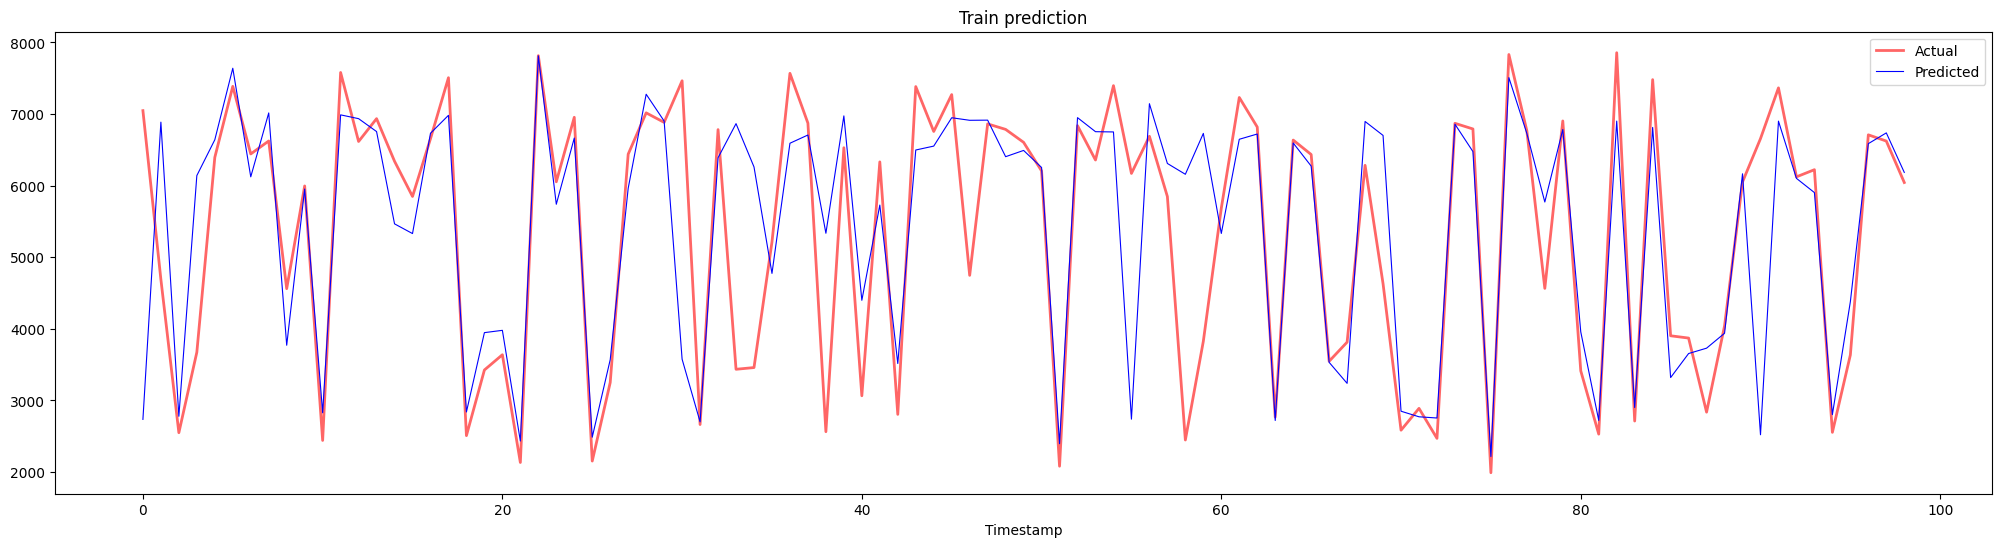

In [49]:
# evaluate train data
train_pred = fo_model.predict(train_x).reshape(-1,1)
y_train_pred = fo_scaler.inverse_transform(train_pred)
y_train = fo_scaler.inverse_transform(train_y)
print("train mape: ", mean_absolute_percentage_error(y_train_pred, y_train))

plt.figure(figsize=(25,6))
plt.plot(range(len(train_x)), y_train, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(range(len(train_x)), y_train_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Train prediction")
plt.show()

validate mape:  0.14052665978996004


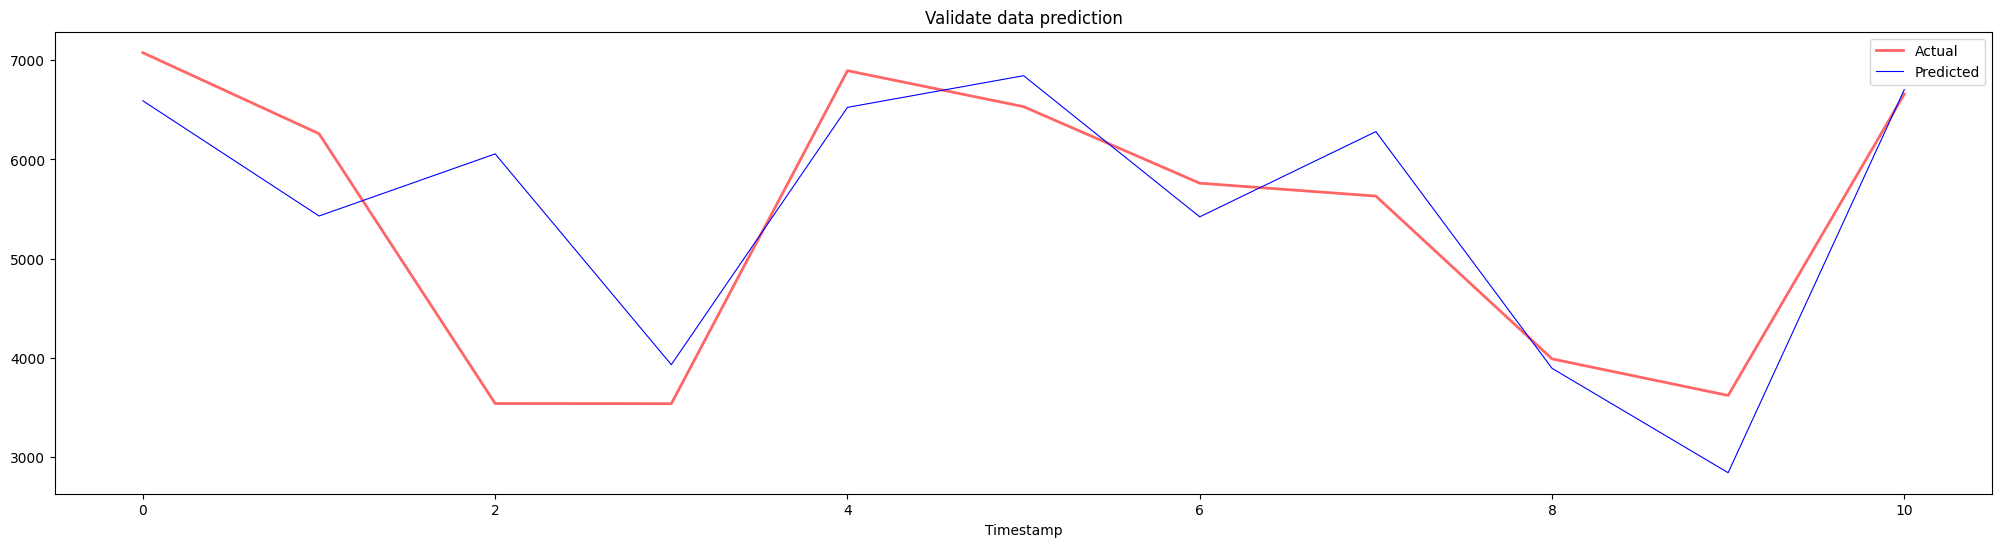

In [50]:
# evaluate validate data
validate_pred = fo_model.predict(validate_x).reshape(-1,1)
y_validate_pred = fo_scaler.inverse_transform(validate_pred)
y_validate = fo_scaler.inverse_transform(validate_y)
print("validate mape: ", mean_absolute_percentage_error(y_validate_pred, y_validate))

plt.figure(figsize=(25,6))
plt.plot(range(len(validate_x)), y_validate, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(range(len(validate_x)), y_validate_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Validate data prediction")
plt.show()

In [51]:
test_data = []
first = french_open_data[2022]
first = first[(first["DATE"] >= "2022-05-15") & (first["DATE"] <= "2022-06-05")]

second = french_open_data[2023]
second = second[(second["DATE"] >= "2023-05-22") & (second["DATE"] <= "2023-06-12")]

for i in range(french_open_days):
    first_day = first.iloc[i]["COUNT_SCALE"]
    second_day = second.iloc[i]["COUNT_SCALE"]
    test_data.append([first_day, second_day])

test_data = np.array(test_data)
test_data.shape

(22, 2)

[6891.8234692  7475.36278558 7410.40339834 7341.89618847 6919.66458572
 5783.41512608 4284.73002711 3858.25543787 7141.0931408  7363.56740393
 7483.68503763 8152.94226632 5234.31881164 3539.78580227 7537.10145646
 7471.02553828 7428.79555371 5866.41555298 7198.15540449 5894.53587011
 3725.34472072 6088.46014564]


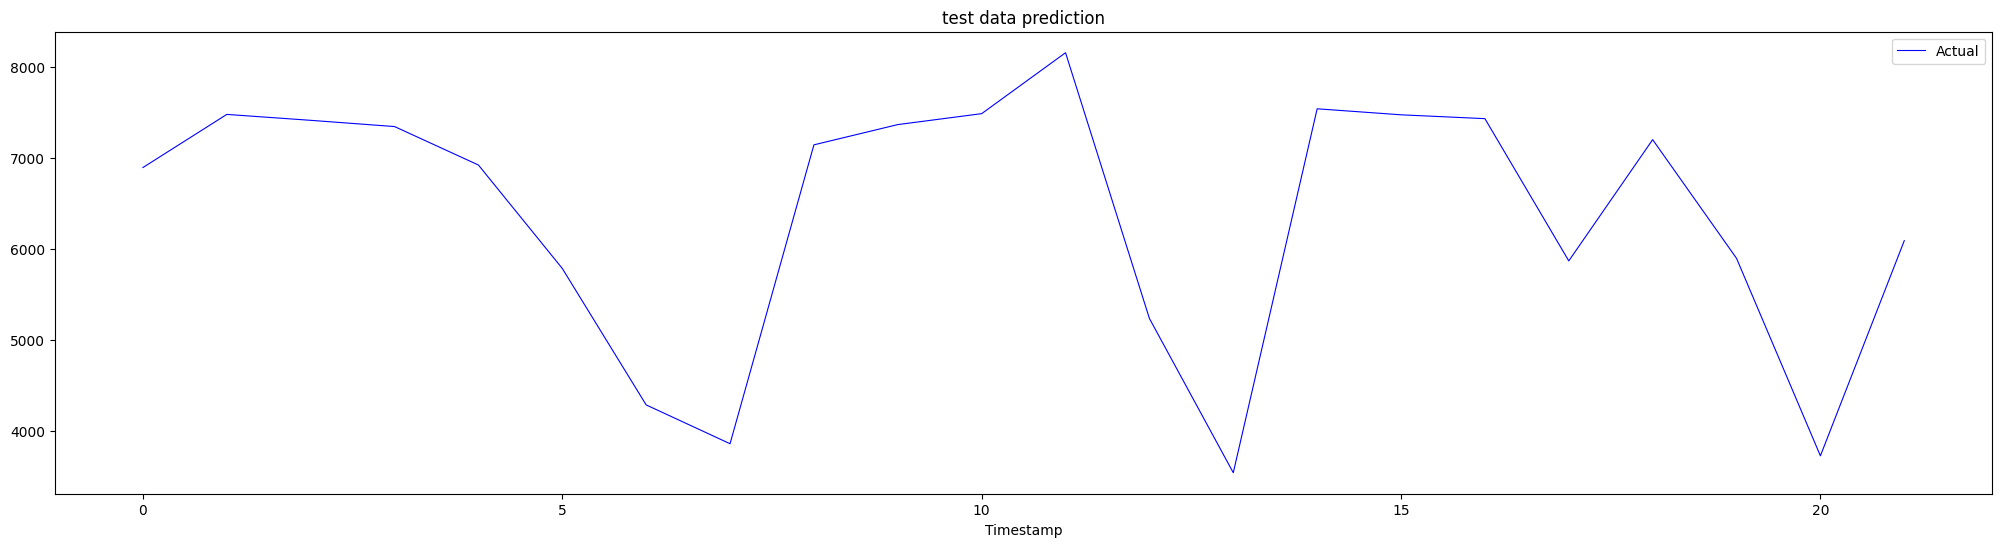

In [52]:
test_pred = fo_model.predict(test_data).reshape(-1,1)
y_test_pred = fo_scaler.inverse_transform(test_pred)
print(y_test_pred.reshape(-1))
plt.figure(figsize=(25,6))
plt.plot(range(len(test_data)), y_test_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("test data prediction")
plt.show()

[French Open 2023 Total Attendence](https://www.globaldata.com/media/sport/french-open-2023-generates-nearly-100-million-sponsorship-revenue-reveals-globaldata/#:~:text=However%2C%20a%20record%2Dbreaking%20630%2C000%20people%20attended%20the%202023%20French%20Open%2C%20with%20the%20players%20admitting%20to%20incredible%20atmospheres%20this%20year.)

[Paris Olympic Expected Attendence](https://www.campusfrance.org/en/actu/jeux-olympiques-de-paris-2024-des-missions-ouvertes-aux-jeunes-et-aux-etudiants#:~:text=15%20million%20spectators%20expected%20and%20thousands%20of%20athletes%20welcomed%2C)

In [53]:
fo_2023_total_attendence = 630000
op_2024_attendence_from_news = 15000000
ratio = op_2024_attendence_from_news / fo_2023_total_attendence

fo_2024_expected_attendence = y_test_pred.reshape(-1)
op_2024_expected_attendence = fo_2024_expected_attendence * ratio

print("Paris Olympic 2024 expected attendence: ")
op_2024_expected_attendence


Paris Olympic 2024 expected attendence: 


array([164091.03498094, 177984.82822809, 176438.17615093, 174807.05210642,
       164753.91870763, 137700.36014472, 102017.38159792,  91863.22471114,
       170026.02716198, 175323.03342702, 178182.9770864 , 194117.6730076 ,
       124626.63837237,  84280.61433987, 179454.7965824 , 177881.56043531,
       176876.08461225, 139676.56078527, 171384.65248776, 140346.09214539,
        88698.68382655, 144963.33680098])

### Calculate average of ridership for each days.
In this section, I feel like we only need to calculate the average ridership of Monday, Tuesday...Sunday. There's actually no need to predict, since daily ridership wouldn't change much. And we possibly only need to get the data from year 2022-2023, since the data from 2015-2021 are affected by COVID and prob outdated.

But I also implement the a prediction in the very end, which I think I use the wrong method.

In [54]:
df_2022_day = df_2022[(df_2022["DATE"] <= "2022-05-15") | (df_2022["DATE"] >= "2022-06-05")]
df_2023_day = df_2023[(df_2023["DATE"] <= "2023-05-22") | (df_2023["DATE"] >= "2023-06-12")]

df_day = pd.concat([df_2022_day, df_2023_day])[["DAY_OF_WEEK", "COUNT"]]
df_day_mean = df_day.groupby(["DAY_OF_WEEK"]).mean().reset_index()
df_day_mean

,DAY_OF_WEEK,COUNT
0,Friday,5747.181818
1,Monday,5241.015152
2,Saturday,3607.446154
3,Sunday,2151.924242
4,Thursday,5806.409091
5,Tuesday,5670.015152
6,Wednesday,5970.666667


In [55]:
df_day_medium = df_day.groupby(["DAY_OF_WEEK"]).median().reset_index()
df_day_medium

,DAY_OF_WEEK,COUNT
0,Friday,6364.5
1,Monday,5909.0
2,Saturday,3772.0
3,Sunday,2256.5
4,Thursday,6482.5
5,Tuesday,6247.0
6,Wednesday,6276.5


### Predict Daily (weekday, weekend) with non french open data

In [56]:
nfo_scaler = MinMaxScaler()

# Add non-French Open data (start from first Sunday of each year)
# align dates with weekdays and weekends
start_dates2 = ["2015-01-04", "2016-01-03", "2017-01-01", "2018-01-07", "2019-01-06", "2022-01-03", "2023-01-02"]
end_dates2 = ["2015-05-14", "2016-05-12", "2017-05-11", "2018-05-17", "2019-05-16", "2022-05-13", "2023-05-12"]

counts = pd.concat([
    df_2015[(df_2015["DATE"] >= start_dates2[0]) & (df_2015["DATE"] <= end_dates2[0])]["COUNT"], 
    df_2016[(df_2016["DATE"] >= start_dates2[1]) & (df_2016["DATE"] <= end_dates2[1])]["COUNT"], 
    df_2017[(df_2017["DATE"] >= start_dates2[2]) & (df_2017["DATE"] <= end_dates2[2])]["COUNT"], 
    df_2018[(df_2018["DATE"] >= start_dates2[3]) & (df_2018["DATE"] <= end_dates2[3])]["COUNT"], 
    df_2019[(df_2019["DATE"] >= start_dates2[4]) & (df_2019["DATE"] <= end_dates2[4])]["COUNT"], 
    df_2022[(df_2022["DATE"] >= start_dates2[5]) & (df_2022["DATE"] <= end_dates2[5])]["COUNT"], 
    df_2023[(df_2023["DATE"] >= start_dates2[6]) & (df_2023["DATE"] <= end_dates2[6])]["COUNT"]]).values
nfo_scaler.fit(counts.reshape(-1, 1))

MinMaxScaler()

In [57]:
for key, df in french_open_data.items():
    df["NFO_COUNT_SCALE"] = nfo_scaler.transform(df["COUNT"].values.reshape(-1, 1))

for idx, (year, data) in enumerate(french_open_data.items()):
    print("{}: {} days".format(year, len(data[(data["DATE"] >= start_dates2[idx]) & (data["DATE"] <= end_dates2[idx])])))

df_2015.head()

2015: 132 days
2016: 131 days
2017: 131 days
2018: 131 days
2019: 131 days
2022: 88 days
2023: 131 days


,DATE,STATION_ID,COUNT,DAY_OF_WEEK,STATION,COUNT_SCALE,NFO_COUNT_SCALE
0,2015-01-01,542,882,Thursday,NaN,-0.100331,0.119574
1,2015-01-02,542,2732,Friday,NaN,0.191513,0.372099
2,2015-01-03,542,2377,Saturday,NaN,0.135510,0.323642
3,2015-01-04,542,1584,Sunday,NaN,0.010412,0.215397
4,2015-01-05,542,4951,Monday,NaN,0.541568,0.674993


In [58]:
days = 131
nof_dataset = []
for idx in range(2, len(years)):
    first = french_open_data[years[idx - 2]]
    first = first[(first["DATE"] >= start_dates2[idx - 2]) & (first["DATE"] <= end_dates2[idx - 2])]

    second = french_open_data[years[idx - 1]]
    second = second[(second["DATE"] >= start_dates2[idx - 1]) & (second["DATE"] <= end_dates2[idx - 1])]

    third = french_open_data[years[idx]]
    third = third[(third["DATE"] >= start_dates2[idx]) & (third["DATE"] <= end_dates2[idx])]
    for i in range(days):
        first_day = first.iloc[i]["NFO_COUNT_SCALE"]
        second_day = second.iloc[i]["NFO_COUNT_SCALE"]
        third_day = third.iloc[i]["NFO_COUNT_SCALE"]
        nof_dataset.append([first_day, second_day, third_day])

nfo_dataset = np.array(nof_dataset)
nfo_dataset.shape

IndexError: single positional indexer is out-of-bounds

In [ ]:
nfo_dataset_x, nfo_dataset_y = nfo_dataset[:, :-1], nfo_dataset[:, [-1]]
print("nfo_dataset shape: ", nfo_dataset_x.shape, nfo_dataset_y.shape)
train_x, validate_x, train_y, validate_y = train_test_split(nfo_dataset_x, nfo_dataset_y, test_size=0.1, shuffle=True)
print("after split:", train_x.shape, train_y.shape, validate_x.shape, validate_y.shape)

nfo_dataset shape:  (655, 2) (655, 1)
after split: (589, 2) (589, 1) (66, 2) (66, 1)


In [ ]:
# build model
nfo_model = SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.05, gamma=0.5,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
nfo_model.fit(train_x, train_y[:, 0])

SVR(C=10, epsilon=0.05, gamma=0.5)

### Evaluate Model

train mape:  0.26296214321650396


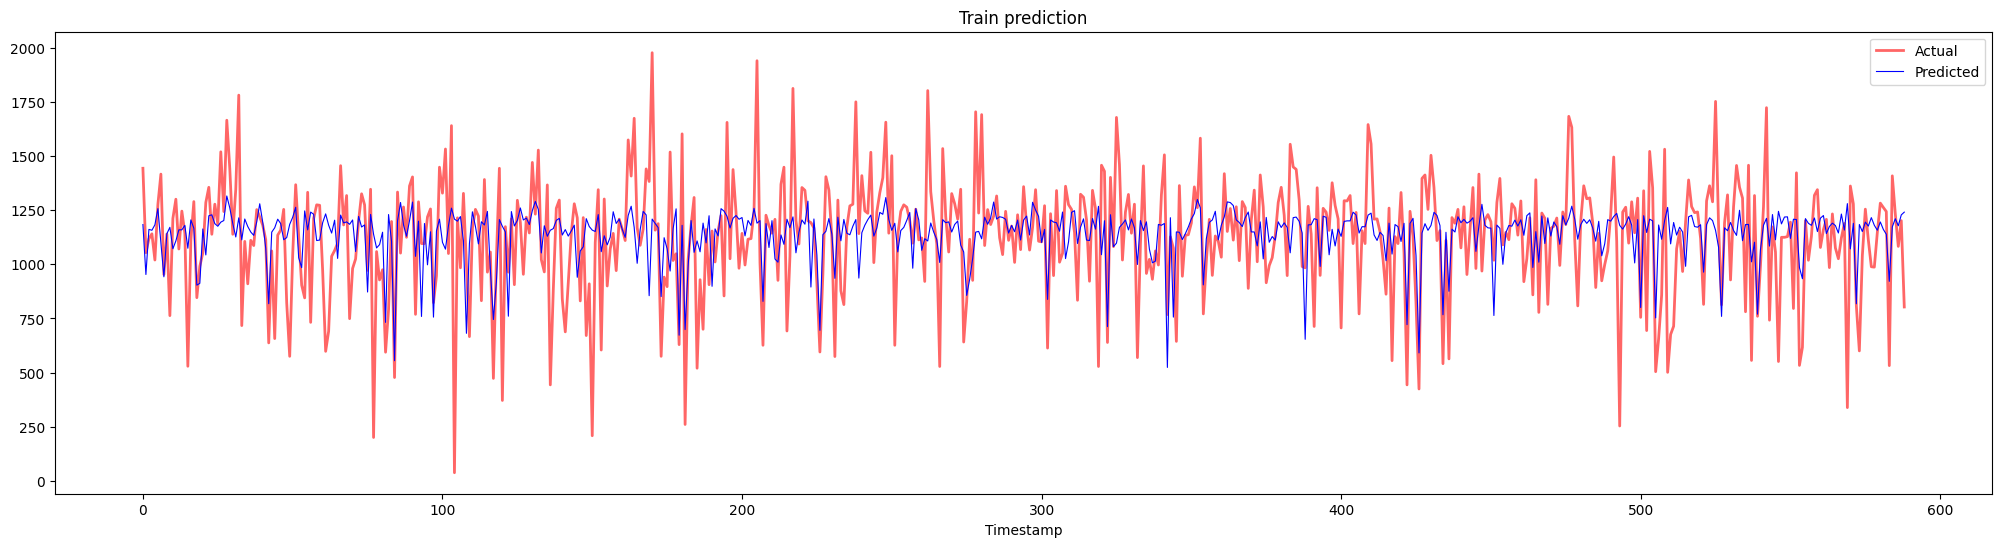

In [ ]:
# evaluate train data
train_pred = nfo_model.predict(train_x).reshape(-1,1)
y_train_pred = nfo_scaler.inverse_transform(train_pred)
y_train = nfo_scaler.inverse_transform(train_y)
print("train mape: ", mean_absolute_percentage_error(y_train_pred, y_train))

plt.figure(figsize=(25,6))
plt.plot(range(len(train_x)), y_train, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(range(len(train_x)), y_train_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Train prediction")
plt.show()

validate mape:  0.16935726395544254


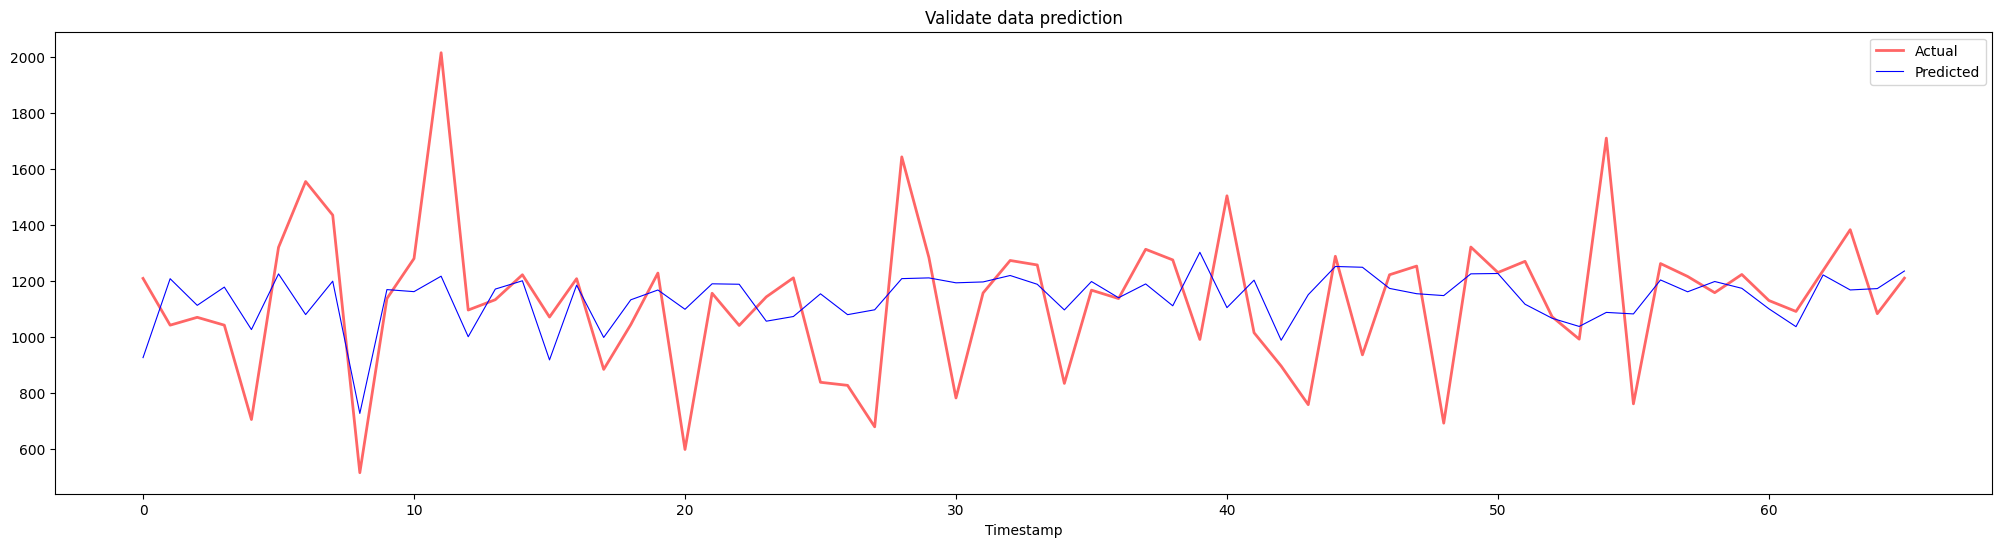

In [ ]:
# evaluate validate data
validate_pred = nfo_model.predict(validate_x).reshape(-1,1)
y_validate_pred = nfo_scaler.inverse_transform(validate_pred)
y_validate = nfo_scaler.inverse_transform(validate_y)
print("validate mape: ", mean_absolute_percentage_error(y_validate_pred, y_validate))

plt.figure(figsize=(25,6))
plt.plot(range(len(validate_x)), y_validate, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(range(len(validate_x)), y_validate_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Validate data prediction")
plt.show()

In [ ]:
test_data = []
first = french_open_data[2022]
first = first[(first["DATE"] >= "2022-05-01") & (first["DATE"] <= "2022-05-07")]

second = french_open_data[2023]
second = second[(second["DATE"] >= "2023-05-08") & (second["DATE"] <= "2023-05-14")]

days = 7
for i in range(days):
    first_day = first.iloc[i]["COUNT_SCALE"]
    second_day = second.iloc[i]["COUNT_SCALE"]
    test_data.append([first_day, second_day])

test_data = np.array(test_data)
test_data.shape

(7, 2)

[[ 79.15835458]
 [274.34820879]
 [336.16416179]
 [360.21504351]
 [354.10539487]
 [425.38353812]
 [297.87357216]]


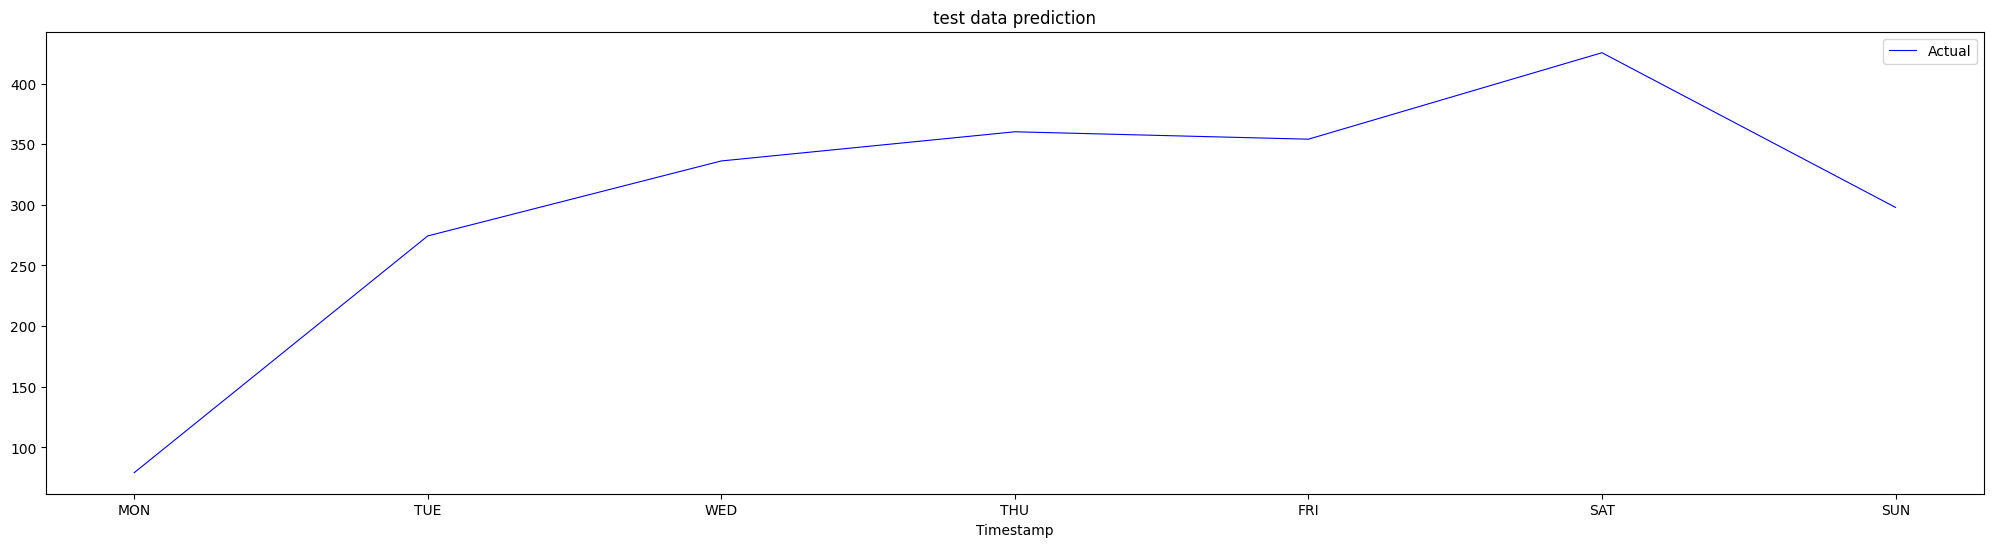

In [ ]:
test_pred = nfo_model.predict(test_data).reshape(-1,1)
y_test_pred = nfo_scaler.inverse_transform(test_pred)
print(y_test_pred)
plt.figure(figsize=(25,6))
plt.plot(["MON", "TUE", "WED", "THU", "FRI", "SAT", "SUN"], y_test_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("test data prediction")
plt.show()